# Goal:
### build a machine learning model that classifies the data points into to classes: Live and Die
# Dataset:
### A number of hepatitis patient symptoms and whether they survived.
# Challenges:
### Many features have missing values
### There are only 155 samples, each containing 19 features
### Class imbalance: Most of the data belongs to patients who survived

#  
#  
#  

# Get the data from a text file and put it into a dataframe

In [1]:
import pandas as pd
import numpy as np
file_path = '../Datasets/Hepatitis/hepatitis.txt'
df = pd.read_csv(file_path, sep=",", header=None)
df.columns = ['Class', 'Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia',
              'LiverBig', 'LiverFirm', 'SpleenPalpable', 'Spiders', 'Ascites', 'Varices', 
              'Bilirubin', 'AlkPhosphate', 'Sgite', 'Albumin', 'Protime', 'Histology']

In [2]:
print('The dataset has', df.shape[0], 'rows')

The dataset has 155 rows


## A subset of data must be separated for testing before any analysis is done, since test data is usually not available at the time of Training/analysis

In [3]:
# I'll put aside 20% of data for testing purposes
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df.Class, test_size=0.2, random_state=0)

In [4]:
X_test.shape

(31, 19)

In [5]:
# put X, y together for further analysis
df_train = pd.concat([X_train, y_train], axis=1, sort=False)
df_test = pd.concat([X_test, y_test], axis=1, sort=False)

In [6]:
df_train.head()

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,Sgite,Albumin,Protime,Histology,Class
19,38,1,1,1,2,2,2,1,1,2,2,2,2,0.70,70,28,4.2,62,1,2
94,59,1,1,2,1,1,2,2,1,1,1,2,2,1.50,107,157,3.6,38,2,1
96,30,1,1,2,1,1,2,2,1,2,1,2,2,0.80,147,128,3.9,100,2,2
22,31,1,2,2,2,2,2,2,2,2,2,2,2,1.00,85,20,4.0,100,1,2
51,39,1,2,2,2,2,2,2,2,2,2,2,2,1.00,85,20,4.0,?,1,2


In [7]:
# Replace ? with nan (missing values)
df_train.replace('?', np.nan, inplace=True)
df_train.head()

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,Sgite,Albumin,Protime,Histology,Class
19,38,1,1,1,2,2,2,1,1,2,2,2,2,0.70,70,28,4.2,62,1,2
94,59,1,1,2,1,1,2,2,1,1,1,2,2,1.50,107,157,3.6,38,2,1
96,30,1,1,2,1,1,2,2,1,2,1,2,2,0.80,147,128,3.9,100,2,2
22,31,1,2,2,2,2,2,2,2,2,2,2,2,1.00,85,20,4.0,100,1,2
51,39,1,2,2,2,2,2,2,2,2,2,2,2,1.00,85,20,4.0,NaN,1,2


In [8]:
print('# of missing values in each feature:')
df_train.isna().sum()

# of missing values in each feature:


Age                0
Sex                0
Steroid            1
Antivirals         0
Fatigue            0
Malaise            0
Anorexia           0
LiverBig           5
LiverFirm          6
SpleenPalpable     4
Spiders            4
Ascites            4
Varices            4
Bilirubin          3
AlkPhosphate      22
Sgite              1
Albumin            9
Protime           52
Histology          0
Class              0
dtype: int64

## For future development: 
### Use correlation between features to more effactively impute the missing values

In [9]:
# Qualitative and Quantitative features according to the documentation:
# Qualitative: Sex, Steroid, Antivirals, Fatigue, Malaise, Anorexia, 
#             LiverBig, LiverFirm, SpleenPalpable, Spiders, 
#             Ascites, Varices, Histology

# Quantitative: Age, Bilirubin, AlkPhosphate, Sgite, Albumin, Protime

#### Quantitative: Use pair plot to see if there are any correlations between pairs of features

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
cols = ['Age', 'Bilirubin', 'AlkPhosphate', 'Sgite', 'Albumin', 'Protime']
sns.pairplot(df_train[cols], height = 3)
plt.show()

<Figure size 1800x1800 with 42 Axes>

In [11]:
# There is some correlation between these pairs of features:
# 'AlkPhosphate', 'Sgite'
# 'AlkPhosphate', 'Protime'
# 'Sgite', 'Protime'

#### Qualitative: Use cross tables to see if there are any correlations between pairs of features

In [12]:
quals = ['Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 'LiverBig', 'LiverFirm', 'SpleenPalpable', 'Spiders', 'Ascites', 'Varices', 'Histology']

In [13]:
# I want to find cross tables that have one of the following 2 formats:
# [large small]    [small large]
# [small large]    [large small]

In [14]:
for i in range(len(quals)-1):
    for j in range(i+1, len(quals)):
        print(pd.crosstab(df_train[quals[i]], df_train[quals[j]]))
        print('\n')

Steroid   1   2
Sex            
1        53  59
2         4   7


Antivirals   1   2
Sex               
1           16  97
2            3   8


Fatigue   1   2
Sex            
1        70  43
2         9   2


Malaise   1   2
Sex            
1        42  71
2         6   5


Anorexia   1   2
Sex             
1         24  89
2          2   9


LiverBig   1   2
Sex             
1         17  91
2          2   9


LiverFirm   1   2
Sex              
1          41  66
2           5   6


SpleenPalpable   1   2
Sex                   
1               21  89
2                1   9


Spiders   1   2
Sex            
1        34  76
2         3   7


Ascites   1   2
Sex            
1        16  94
2         0  10


Varices   1   2
Sex            
1        12  98
2         0  10


Histology   1   2
Sex              
1          63  50
2           9   2


Antivirals   1   2
Steroid           
1            8  49
2           10  56


Fatigue   1   2
Steroid        
1        40  17
2        39  27




In [15]:
# There are no such relationships!

### Pearson correlation can also be calculated

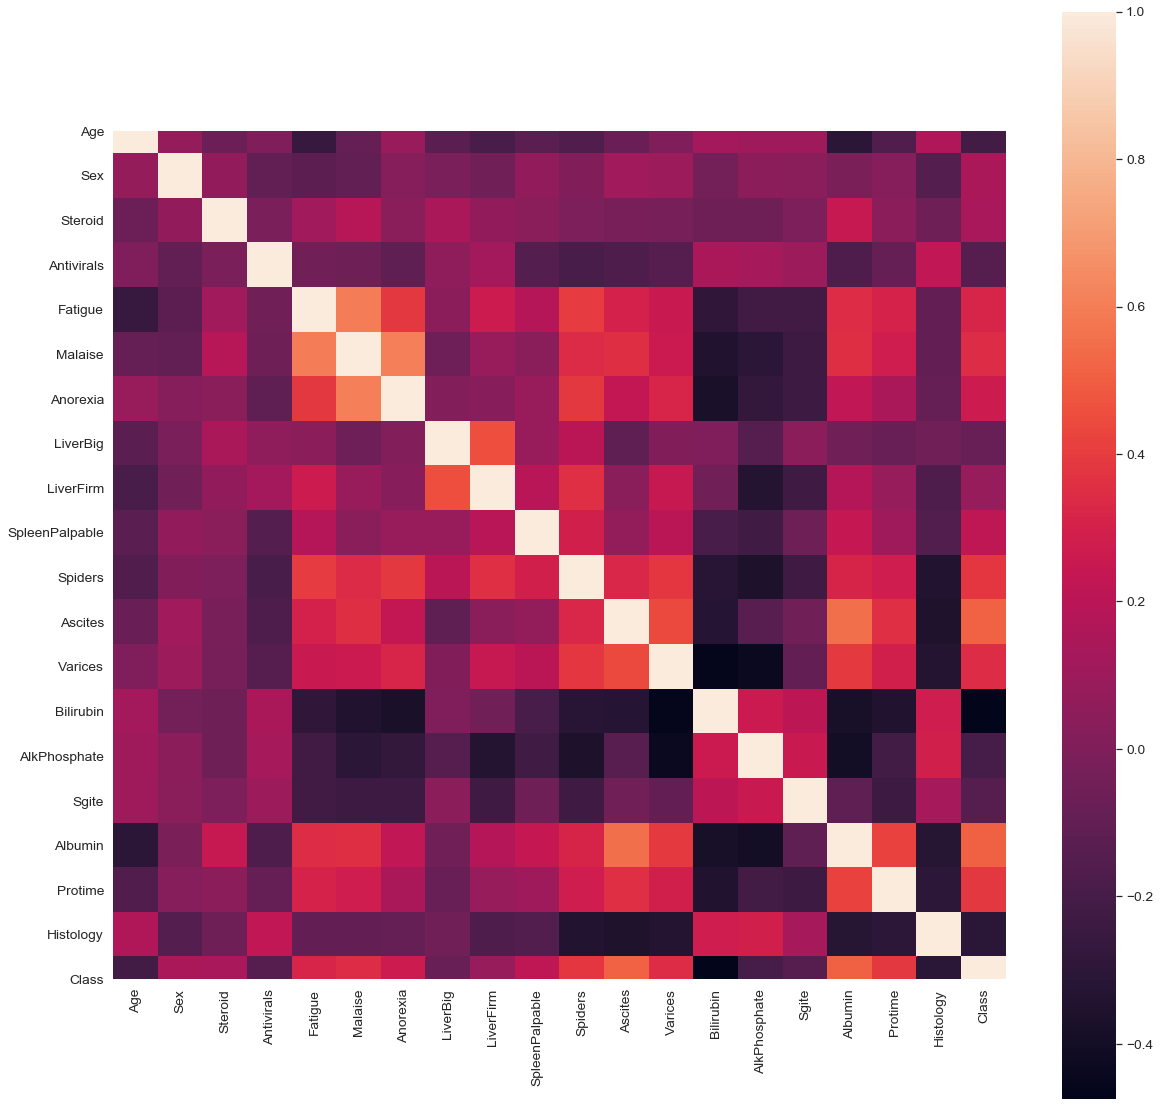

In [16]:
corrmat = df_train.apply(pd.to_numeric).corr()
cols = df_train.columns
plt.figure(figsize=(20, 20))
sns.set(font_scale=1.25)
hm = sns.heatmap(corrmat, cbar=True, square=True, fmt='.4f', annot_kws={'size': 50}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [17]:
corrmat

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,Sgite,Albumin,Protime,Histology,Class
Age,1.000000,0.073113,-0.066183,0.002276,-0.258872,-0.084321,0.086074,-0.123170,-0.189159,-0.128018,-0.167549,-0.073117,-0.001629,0.127637,0.106882,0.107941,-0.306939,-0.165243,0.165656,-0.214848
Sex,0.073113,1.000000,0.062707,-0.103510,-0.117501,-0.101436,0.021352,-0.019302,-0.042545,0.064935,0.005441,0.118262,0.100504,-0.040891,0.039802,0.037259,-0.012305,0.022365,-0.150190,0.148888
Steroid,-0.066183,0.062707,1.000000,-0.015751,0.115315,0.192386,0.037984,0.145321,0.062101,0.036122,-0.003672,-0.019514,-0.030575,-0.062679,-0.060096,-0.004753,0.250058,0.045569,-0.062788,0.139723
Antivirals,0.002276,-0.103510,-0.015751,1.000000,-0.051443,-0.062275,-0.109110,0.060526,0.122598,-0.146506,-0.190723,-0.170122,-0.144576,0.148102,0.133778,0.100115,-0.169739,-0.084430,0.225393,-0.145395
Fatigue,-0.258872,-0.117501,0.115315,-0.051443,1.000000,0.599800,0.388746,0.041335,0.267573,0.181745,0.395682,0.298444,0.253629,-0.285638,-0.218306,-0.218924,0.344368,0.306710,-0.097580,0.317011
Malaise,-0.084321,-0.101436,0.192386,-0.062275,0.599800,1.000000,0.607455,-0.056056,0.087919,0.033364,0.340124,0.354459,0.258199,-0.343852,-0.304367,-0.233373,0.353289,0.276709,-0.096328,0.344891
Anorexia,0.086074,0.021352,0.037984,-0.109110,0.388746,0.607455,1.000000,0.009609,0.027803,0.086146,0.387970,0.232888,0.319444,-0.373232,-0.277730,-0.235739,0.225652,0.145208,-0.084179,0.263883
LiverBig,-0.123170,-0.019302,0.145321,0.060526,0.041335,-0.056056,0.009609,1.000000,0.453531,0.086295,0.200900,-0.106159,0.005172,-0.000363,-0.145779,0.042867,-0.042562,-0.079326,-0.047261,-0.081419
LiverFirm,-0.189159,-0.042545,0.062101,0.122598,0.267573,0.087919,0.027803,0.453531,1.000000,0.194821,0.355714,0.036128,0.246970,-0.051310,-0.334244,-0.228803,0.185636,0.081095,-0.172727,0.082390
SpleenPalpable,-0.128018,0.064935,0.036122,-0.146506,0.181745,0.033364,0.086146,0.086295,0.194821,1.000000,0.289918,0.067579,0.201008,-0.187415,-0.226178,-0.062794,0.241627,0.111094,-0.159016,0.220779


# Use mean/mode missing value imputation

In [18]:
# Qualitative: Sex, Steroid, Antivirals, Fatigue, Malaise, Anorexia, 
#             LiverBig, LiverFirm, SpleenPalpable, Spiders, 
#             Ascites, Varices, Histology

# Quantitative: Age, Bilirubin, AlkPhosphate, Sgite, Albumin, Protime

In [19]:
mean_mode_imp_dic = {}

### Mean for quantitative

In [20]:
quants = ['Age', 'Bilirubin', 'AlkPhosphate', 'Sgite', 'Albumin', 'Protime']
for c in quants:
    currentCol = df_train[c].copy().apply(pd.to_numeric)
    currentCol = currentCol[~currentCol.isnull()]
    mean_mode_imp_dic[c] = currentCol.mean()

### Mode for qualitative

In [21]:
quals = ['Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 'LiverBig', 
         'LiverFirm', 'SpleenPalpable', 'Spiders', 'Ascites', 'Varices', 'Histology']
for c in quals:
    currentCol = df_train[c].copy().apply(pd.to_numeric)
    currentCol = currentCol[~currentCol.isnull()]
    mean_mode_imp_dic[c] = currentCol.mode().iat[0]

In [22]:
mean_mode_imp_dic

{'Age': 41.645161290322584,
 'Bilirubin': 1.4438016528925615,
 'AlkPhosphate': 103.66666666666667,
 'Sgite': 85.82113821138212,
 'Albumin': 3.8173913043478267,
 'Protime': 63.27777777777778,
 'Sex': 1,
 'Steroid': 2.0,
 'Antivirals': 2,
 'Fatigue': 1,
 'Malaise': 2,
 'Anorexia': 2,
 'LiverBig': 2.0,
 'LiverFirm': 2.0,
 'SpleenPalpable': 2.0,
 'Spiders': 2.0,
 'Ascites': 2.0,
 'Varices': 2.0,
 'Histology': 1}

In [23]:
def imputeMissingValues(df):
    allFeatures = ['Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia',
              'LiverBig', 'LiverFirm', 'SpleenPalpable', 'Spiders', 'Ascites', 'Varices', 
              'Bilirubin', 'AlkPhosphate', 'Sgite', 'Albumin', 'Protime', 'Histology']
    for c in allFeatures:
        df[c] = df[c].fillna(mean_mode_imp_dic[c])
    return df

In [24]:
df_train = imputeMissingValues(df_train)

## Change class labels

In [25]:
df_train['Class'] = df_train['Class'].map({2: 0, 1: 1})

# Train a machine learning model

In [26]:
X_train = df_train.drop('Class', axis=1).copy().apply(pd.to_numeric)
y_train = df_train['Class'].ravel()
print(X_train.shape, y_train.shape)

(124, 19) (124,)


In [27]:
X_train.head()

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,Sgite,Albumin,Protime,Histology
19,38,1,1.0,1,2,2,2,1.0,1.0,2.0,2.0,2.0,2.0,0.7,70.0,28.0,4.2,62.000000,1
94,59,1,1.0,2,1,1,2,2.0,1.0,1.0,1.0,2.0,2.0,1.5,107.0,157.0,3.6,38.000000,2
96,30,1,1.0,2,1,1,2,2.0,1.0,2.0,1.0,2.0,2.0,0.8,147.0,128.0,3.9,100.000000,2
22,31,1,2.0,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,20.0,4.0,100.000000,1
51,39,1,2.0,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,20.0,4.0,63.277778,1


In [28]:
ones = sum([1 for i in y_train if i ==1])
zeros = sum([1 for i in y_train if i ==0])
print('Die:', ones, ', Live:', zeros)

Die: 23 , Live: 101


## Baseline: A model that will always predict the patient will live!

In [29]:
print('Baseline accuracy: ', zeros / (zeros+ones))

Baseline accuracy:  0.8145161290322581


## Balance the classes

In [30]:
from imblearn.over_sampling import SMOTE, ADASYN
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

### In this dataset, SMOTE produced better results than random over-sampling

## Feature normalization

In [31]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

## Check for outliers

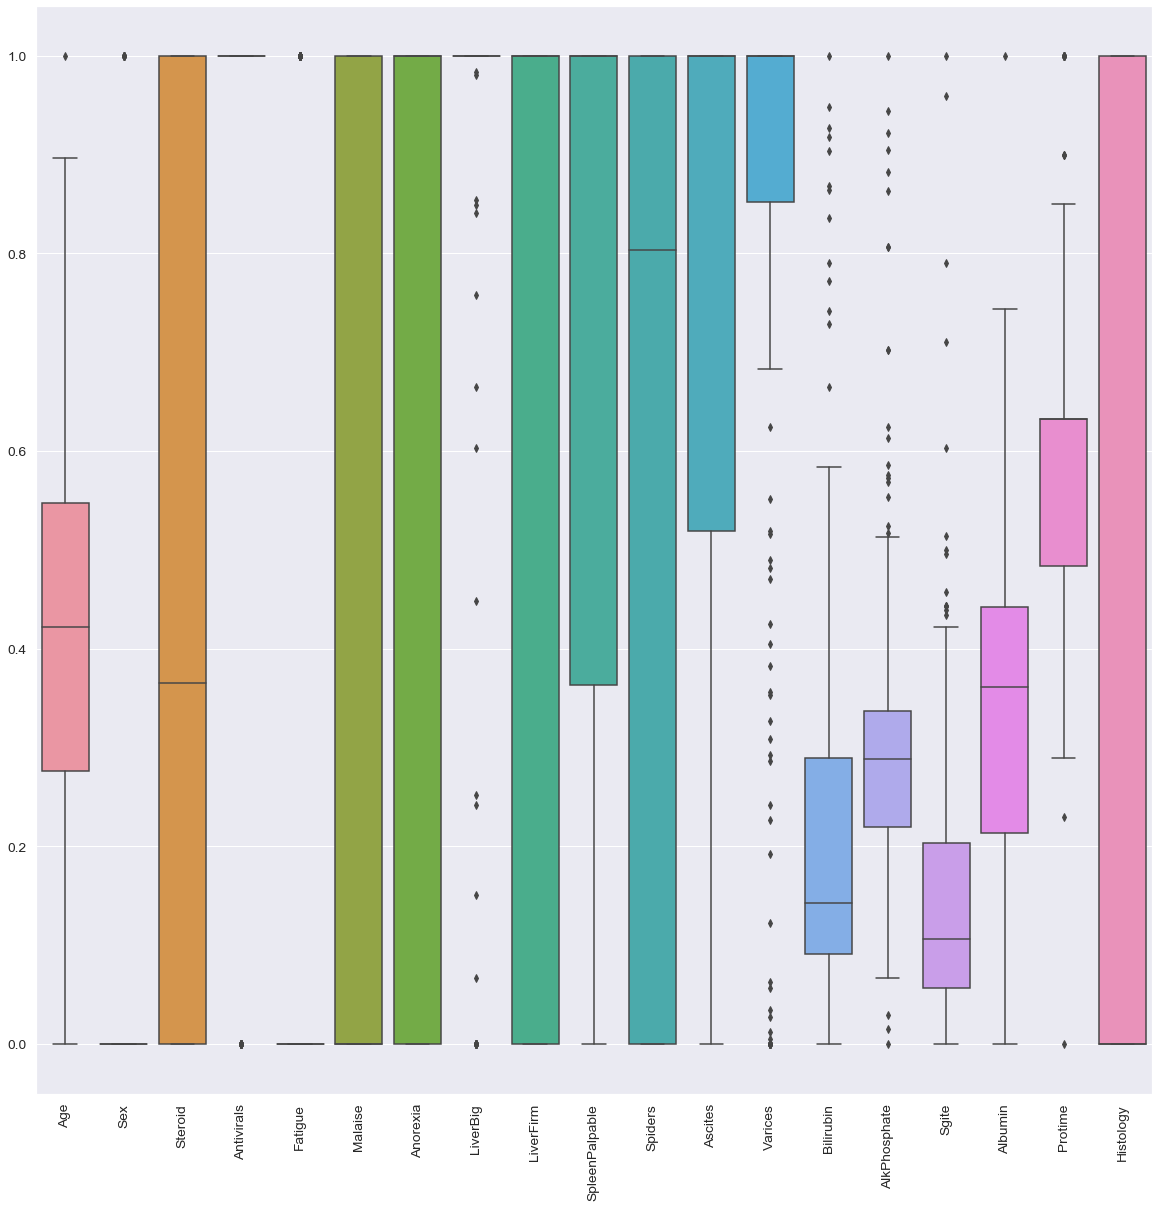

In [32]:
cols = df_train.columns[:-1]
plt.figure(figsize=(20, 20))
plt.xticks( rotation=90)
sns.boxplot(data=pd.DataFrame(X_train, columns=cols))
plt.show()

## TODO: fix outliers

## Grid search

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [34]:
def findBestParameters(model, train_X, train_y):
    modelName = model.__class__.__name__
    parameters = {}
    if modelName == 'SVC':
        parameters = {
            'C':[1000, 100, 10, 1],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'gamma': ['scale', 'auto']}
        
    elif modelName == 'RandomForestClassifier':
        parameters = {
            'n_estimators': [10, 50, 100],
            'max_depth': [10, 25, 50, None],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [1, 2, 4]}
        
    elif modelName == 'MLPClassifier':
        parameters = {
            'hidden_layer_sizes': [(5), (10), (20), 
                        (5, 5), (10, 10), (20, 20), (30, 30),
                        (5, 5, 5), (10, 10, 10), (20, 20, 20)],
            'max_iter': [500, 1000]}
    elif modelName == 'LogisticRegression':
        parameters = {
            'C': [0.1, 0.5, 1, 5, 10]}
    
    clf = GridSearchCV(model, param_grid=parameters, cv=5)
    clf.fit(train_X, train_y)
    print('Best parameters for', modelName, '\n', clf.best_params_)
    
    if modelName == 'SVC':
        return SVC(C=clf.best_params_['C'], 
                   gamma=clf.best_params_['gamma'], 
                   kernel=clf.best_params_['kernel'])
    elif modelName == 'RandomForestClassifier':
        return RandomForestClassifier(n_estimators=clf.best_params_['n_estimators'], 
                                      max_depth=clf.best_params_['max_depth'],
                                     max_features=clf.best_params_['max_features'], 
                                      min_samples_leaf=clf.best_params_['min_samples_leaf'])
    elif modelName == 'MLPClassifier':
        return MLPClassifier(hidden_layer_sizes=clf.best_params_['hidden_layer_sizes'], 
                             max_iter= clf.best_params_['max_iter'])
    elif modelName == 'LogisticRegression':
        return LogisticRegression(C=clf.best_params_['C'])
    
    return np.nan

In [35]:
import warnings
warnings.filterwarnings('ignore')# dont show warnings
allModels = [LogisticRegression(), SVC(), MLPClassifier(), RandomForestClassifier()]
error = []
for i, m in enumerate(allModels):
    m = findBestParameters(m, X_train, y_train)
    m.fit(X_train, y_train)
    allModels[i] = m
    print('')

Best parameters for LogisticRegression 
 {'C': 5}

Best parameters for SVC 
 {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

Best parameters for MLPClassifier 
 {'hidden_layer_sizes': 5, 'max_iter': 1000}

Best parameters for RandomForestClassifier 
 {'max_depth': 25, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 10}



In [36]:
X_train

array([[0.31034483, 0.        , 0.        , ..., 0.48837209, 0.62      ,
        0.        ],
       [0.67241379, 0.        , 0.        , ..., 0.34883721, 0.38      ,
        1.        ],
       [0.17241379, 0.        , 0.        , ..., 0.41860465, 1.        ,
        1.        ],
       ...,
       [0.34482759, 0.        , 1.        , ..., 0.11179043, 0.46129646,
        1.        ],
       [0.56896552, 0.        , 0.80202717, ..., 0.12548711, 0.71075264,
        0.        ],
       [0.44827586, 0.        , 0.        , ..., 0.30638353, 0.63277778,
        0.        ]])

## Preprocess the test data, then train and apply the model on it

In [37]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [38]:
df_test.replace('?', np.nan, inplace=True)
df_test = imputeMissingValues(df_test)
df_test['Class'] = df_test['Class'].map({2: 0, 1: 1})
X_test = df_test.drop('Class', axis=1).apply(pd.to_numeric)
y_test = df_test['Class'].ravel()
X_test = scaler.transform(X_test)

In [39]:
for m in allModels:
    print(m.__class__.__name__)
    y_pred = m.predict(X_test)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('F1 score', f1_score(y_test, y_pred))
    print('Precision score', precision_score(y_test, y_pred))
    print('Recall score', recall_score(y_test, y_pred))
    print('')

LogisticRegression
Accuracy: 0.8387096774193549
F1 score 0.7058823529411765
Precision score 0.75
Recall score 0.6666666666666666

SVC
Accuracy: 0.7741935483870968
F1 score 0.5882352941176471
Precision score 0.625
Recall score 0.5555555555555556

MLPClassifier
Accuracy: 0.8387096774193549
F1 score 0.761904761904762
Precision score 0.6666666666666666
Recall score 0.8888888888888888

RandomForestClassifier
Accuracy: 0.8387096774193549
F1 score 0.6153846153846153
Precision score 1.0
Recall score 0.4444444444444444



## Results: 
### Since the class is imbalanced, and we want to minimize false negatives more than false positives, Recall is the most important measurement because it is sensitive to false negatives, and then f-score is important because it considers both false negatives and false positives. Then Precision, and finally, Accuracy which is irrelevant in this problem.
### By running the notebook multiple times, it becomes clear that neural networks and logistic regression produce the best results, and should be considered for deployment.
### Slightly better results might be achievable through ensemble methods.